In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import brightfish
import brightfish.environment as environment
import brightfish.fish as fish

In [2]:
partitioned_halves = environment.PartitionedHalves((51, 51), 100, 10001, initial_value=0.75, target_value=(1.0, 0.0), static=False)

In [3]:
f = fish.BinocularFish(np.pi/2, (25, 25), static=True, set_point=0.5, max_diff=0.75, learning_rate=1e-2, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})

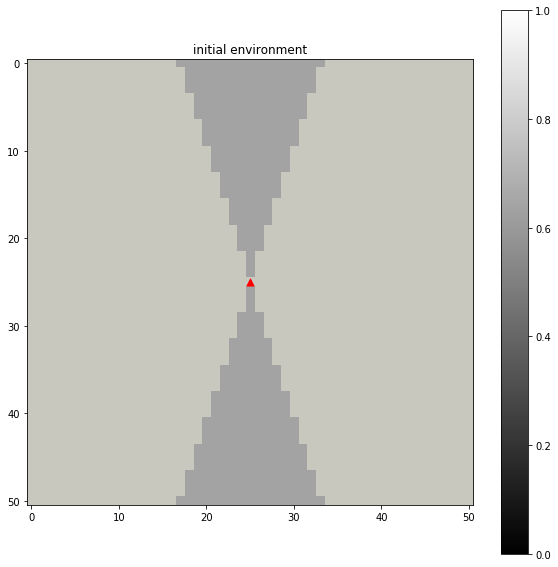

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(partitioned_halves.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=50)
eyes = np.zeros((51, 51))
eyes[f.right_eye((51, 51))] = 1.0
eyes[f.left_eye((51, 51))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('initial environment')
plt.show()

In [5]:
params = f.run(partitioned_halves, 300)

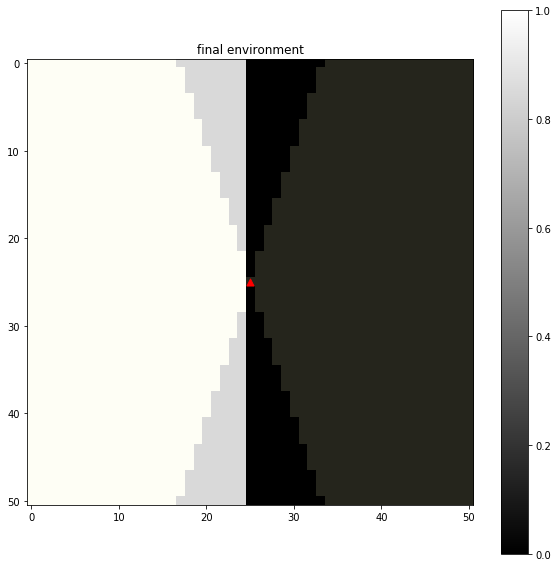

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(partitioned_halves.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=50)
eyes = np.zeros((51, 51))
eyes[f.right_eye((51, 51))] = 1.0
eyes[f.left_eye((51, 51))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('final environment')
plt.show()

In [7]:
partitioned_halves = environment.PartitionedHalves((51, 51), 10001, 10001, initial_value=0.75, target_value=0.75, static=False)

In [8]:
f = fish.BinocularFish(np.pi/2, (25, 25), static=True, set_point=0.5, max_diff=0.75, learning_rate=1e-2, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})

In [9]:
control_params = f.run(partitioned_halves, 300)

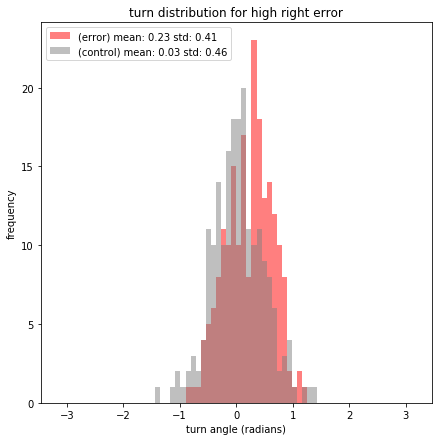

In [10]:
fig = plt.figure(figsize=(7, 7))
plt.hist(params['theta'][100:], range=(-np.pi, np.pi), bins=70, color='red', alpha=0.5, label=f"(error) mean: {np.mean(params['theta'][100:]):.2f} std: {np.std(params['theta'][100:]):.2f}")
plt.hist(control_params['theta'][100:], range=(-np.pi, np.pi), bins=70, color='gray', alpha=0.5, label=f"(control) mean: {np.mean(control_params['theta'][100:]):.2f} std: {np.std(control_params['theta'][100:]):.2f}")
plt.title('turn distribution for high right error')
plt.xlabel('turn angle (radians)')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

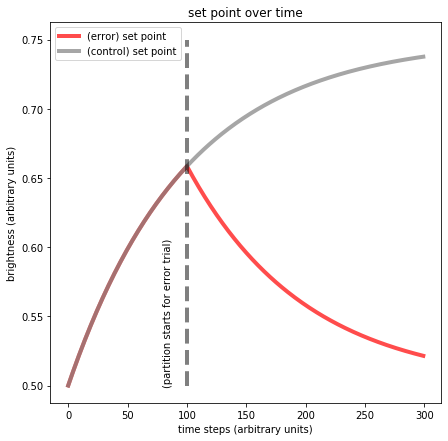

In [11]:
fig = plt.figure(figsize=(7, 7))
plt.plot(params['set_point'][:300], alpha=0.7, lw=4, label='(error) set point', color='red')
plt.plot(control_params['set_point'][:300], alpha=0.7, lw=4, label='(control) set point', color='gray')
plt.legend(loc='best')
plt.ylabel('brightness (arbitrary units)')
plt.xlabel('time steps (arbitrary units)')
plt.text(80, 0.5, '(partition starts for error trial)', rotation='vertical')
plt.plot([100, 100], [0.5, 0.75], lw=4, color='black', linestyle='--', alpha=0.5)
plt.title('set point over time')
plt.show()

In [12]:
# study from black and white halves, black side goes to gray
partitioned_halves = environment.PartitionedHalves((51, 51), 500, 10001, initial_value=(1.0, 0.0), target_value=(1.0, 0.25), static=False)

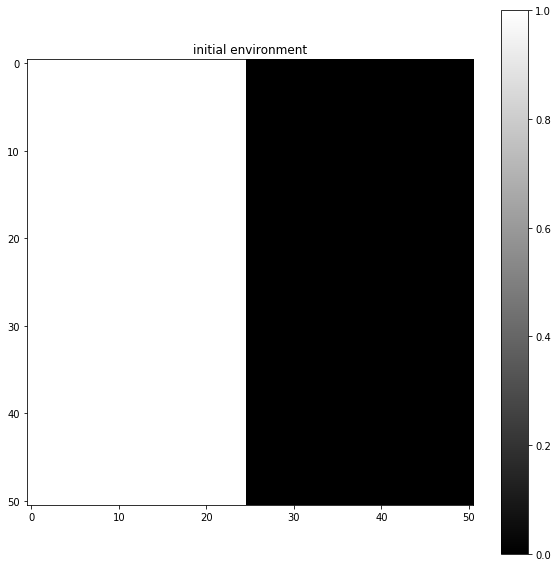

In [13]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(partitioned_halves.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('initial environment')
plt.show()

In [14]:
# perform white/black to white/gray study for binocular fish
f = fish.BinocularFish(np.pi/2, (25, 25), static=True, set_point=0.5, max_diff=0.75, learning_rate=1e-2, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})
binocular_params = f.run(partitioned_halves, 550)

In [15]:
# repeat white/black to white/gray study for monocular fish
partitioned_halves.reset()
f = fish.MonocularFish(np.pi/2, (25, 25), static=True, set_point=(0.5, 0.5), max_diff=0.75, learning_rate=1e-2, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})
monocular_params = f.run(partitioned_halves, 550)

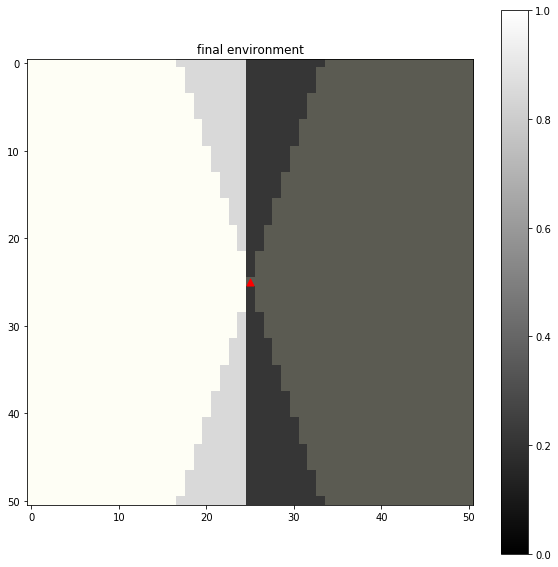

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(partitioned_halves.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=50)
eyes = np.zeros((51, 51))
eyes[f.right_eye((51, 51))] = 1.0
eyes[f.left_eye((51, 51))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('final environment')
plt.show()

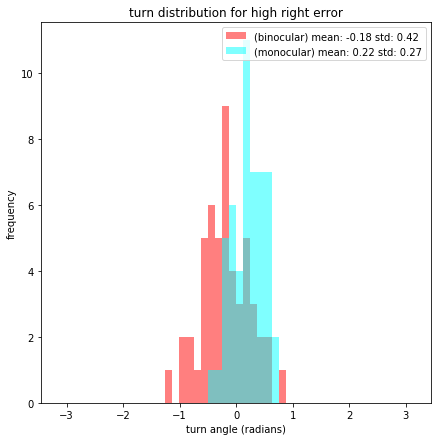

In [17]:
fig = plt.figure(figsize=(7, 7))
plt.hist(binocular_params['theta'][500:], range=(-np.pi, np.pi), bins=50, color='red', alpha=0.5, label=f"(binocular) mean: {np.mean(binocular_params['theta'][500:]):.2f} std: {np.std(binocular_params['theta'][500:]):.2f}")
plt.hist(monocular_params['theta'][500:], range=(-np.pi, np.pi), bins=50, color='cyan', alpha=0.5, label=f"(monocular) mean: {np.mean(monocular_params['theta'][500:]):.2f} std: {np.std(monocular_params['theta'][500:]):.2f}")
plt.title('turn distribution for high right error')
plt.xlabel('turn angle (radians)')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

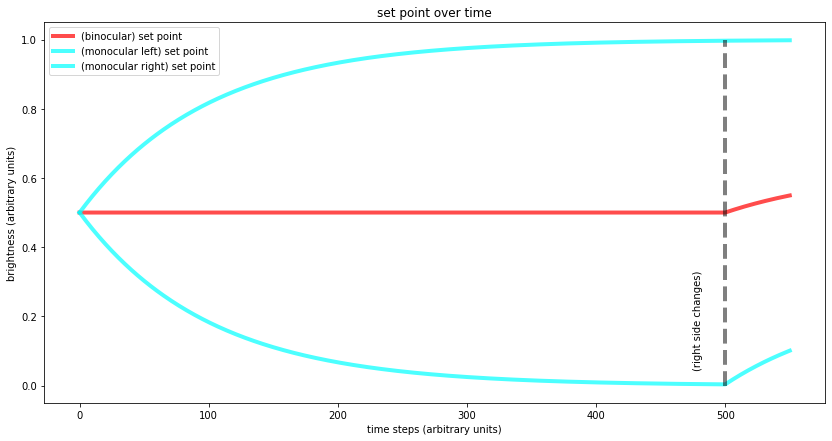

In [18]:
fig = plt.figure(figsize=(14, 7))
plt.plot(binocular_params['set_point'], alpha=0.7, lw=4, label='(binocular) set point', color='red')
plt.plot([sp[0] for sp in monocular_params['set_point']], alpha=0.7, lw=4, label='(monocular left) set point', color='cyan')
plt.plot([sp[1] for sp in monocular_params['set_point']], alpha=0.7, lw=4, label='(monocular right) set point', color='cyan')
plt.legend(loc='best')
plt.ylabel('brightness (arbitrary units)')
plt.xlabel('time steps (arbitrary units)')
plt.text(475, 0.05, '(right side changes)', rotation='vertical')
plt.plot([500, 500], [0.0, 1.0], lw=4, color='black', linestyle='--', alpha=0.5)
plt.title('set point over time')
plt.show()

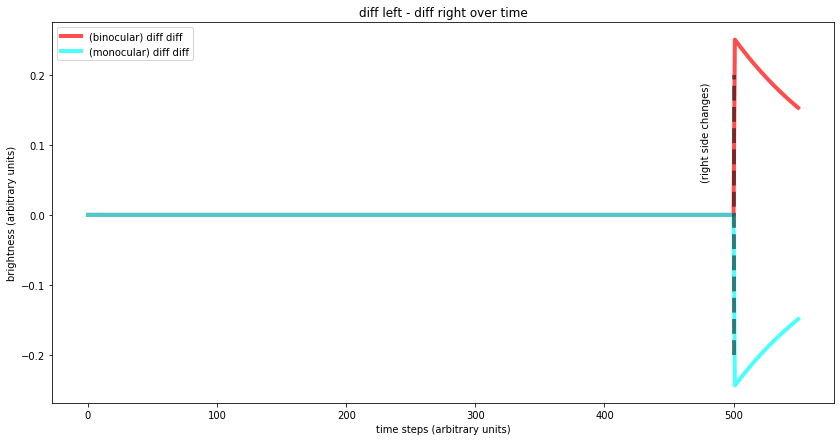

In [19]:
fig = plt.figure(figsize=(14, 7))
plt.plot(np.array(binocular_params['diff_left']) - np.array(binocular_params['diff_right']), alpha=0.7, lw=4, label='(binocular) diff diff', color='red')
plt.plot(np.array(monocular_params['diff_left']) - np.array(monocular_params['diff_right']), alpha=0.7, lw=4, label='(monocular) diff diff', color='cyan')
plt.legend(loc='best')
plt.ylabel('brightness (arbitrary units)')
plt.xlabel('time steps (arbitrary units)')
plt.text(475, 0.05, '(right side changes)', rotation='vertical')
plt.plot([500, 500], [-0.2, 0.2], lw=4, color='black', linestyle='--', alpha=0.5)
plt.title('diff left - diff right over time')
plt.show()

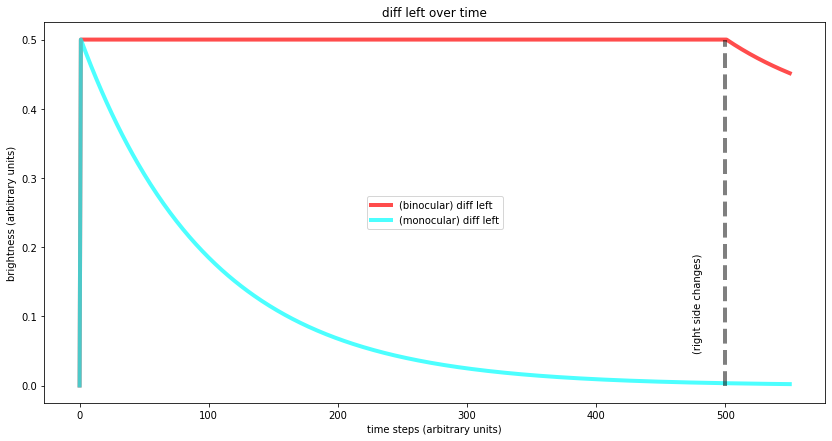

In [20]:
fig = plt.figure(figsize=(14, 7))
plt.plot(np.array(binocular_params['diff_left']), alpha=0.7, lw=4, label='(binocular) diff left', color='red')
plt.plot(np.array(monocular_params['diff_left']), alpha=0.7, lw=4, label='(monocular) diff left', color='cyan')
plt.legend(loc='best')
plt.ylabel('brightness (arbitrary units)')
plt.xlabel('time steps (arbitrary units)')
plt.text(475, 0.05, '(right side changes)', rotation='vertical')
plt.plot([500, 500], [0.0, 0.5], lw=4, color='black', linestyle='--', alpha=0.5)
plt.title('diff left over time')
plt.show()

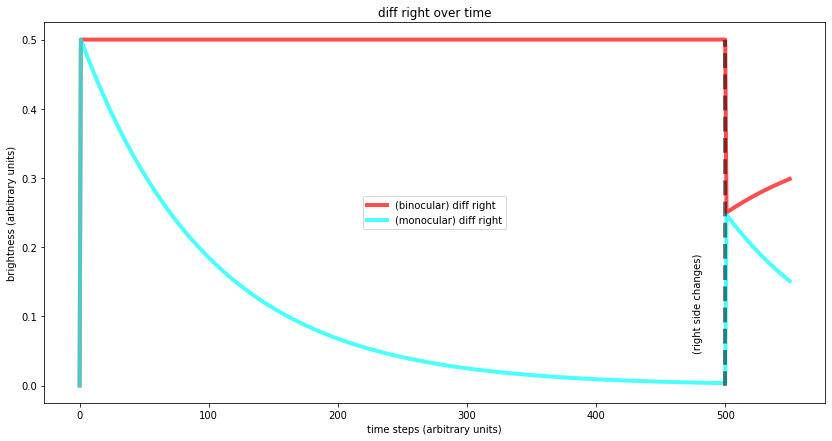

In [21]:
fig = plt.figure(figsize=(14, 7))
plt.plot(np.array(binocular_params['diff_right']), alpha=0.7, lw=4, label='(binocular) diff right', color='red')
plt.plot(np.array(monocular_params['diff_right']), alpha=0.7, lw=4, label='(monocular) diff right', color='cyan')
plt.legend(loc='best')
plt.ylabel('brightness (arbitrary units)')
plt.xlabel('time steps (arbitrary units)')
plt.text(475, 0.05, '(right side changes)', rotation='vertical')
plt.plot([500, 500], [0.0, 0.5], lw=4, color='black', linestyle='--', alpha=0.5)
plt.title('diff right over time')
plt.show()